In [1]:
from tensorflow.keras.layers import Input,Dense,LSTM,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.callbacks import TensorBoard
from keras.callbacks import EarlyStopping

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv('GeneratedXAUUSD dbot.csv')


In [3]:
print(len(df))

96406


In [4]:
df.tail()

,Time,Open,High,Low,Close,Tick Volume
96401,1.704215e+09,2070.33,2070.63,2063.95,2064.79,17931.0
96402,1.704217e+09,2064.74,2065.19,2055.82,2059.29,22342.0
96403,1.704218e+09,2059.28,2067.55,2059.12,2065.39,16918.0
96404,1.704220e+09,2065.39,2066.86,2064.08,2066.04,8295.0
96405,1.704222e+09,2066.02,2066.89,2065.26,2065.76,3181.0


In [5]:
df = df['Close']
df.tail()

96401    2064.79
96402    2059.29
96403    2065.39
96404    2066.04
96405    2065.76
Name: Close, dtype: float64

In [6]:
series = df.values
series = series.reshape((len(series),1))
print(series)


[[1286.34]
 [1302.66]
 [1296.84]
 ...
 [2065.39]
 [2066.04]
 [2065.76]]


<function matplotlib.pyplot.show(close=None, block=None)>

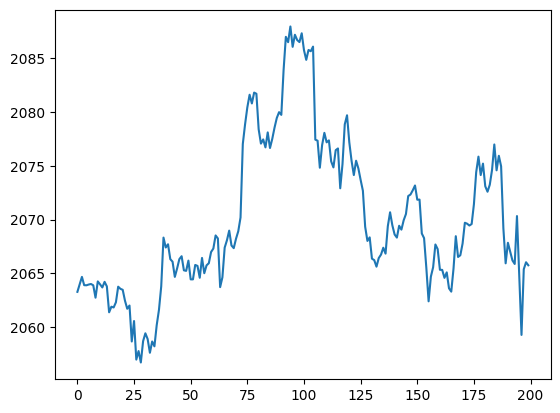

In [7]:
plt.plot(series[-200:])
plt.show

In [8]:
T = 4
x = []
y = []
n = 0
r_len = 0
for t in range(len(series)):
  if(t >= n):
    n += T
    if(n < len(series) and len(series[t : n]) == T and n + 1 < len(series)):
      x.append(series[t : n])
      n += 1
      y.append(series[n])
      #n += 1
    else:
      print("Maximum array is ",len(series)," cant continue to ",n, " or ", n + T)
      r_len = len(series) - (len(series) - n)
      print("remaining index is from ", r_len , " to ", len(series) - 1)
      break
x = np.array(x)
y = np.array(y)

print(x.shape)
print(y.shape)



Maximum array is  96406  cant continue to  96409  or  96413
remaining index is from  96409  to  96405
(19281, 4, 1)
(19281, 1)


In [9]:
x_train = x[:-1000]
y_train = y[:-1000]

x_test = x[-1000:]
y_test = y[-1000:]


print(x_train.shape)
#print(x_val.shape)
print(x_test.shape)

(18281, 4, 1)
(1000, 4, 1)


In [10]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=50,         # Stop after 50 epochs with no improvement
    min_delta=0.001,     # Consider a change of 0.001 as significant
    verbose=1,           # Print a message when stopping
    mode='min',          # Minimize the monitored quantity
    baseline=None,        # Optional: reference value for the monitored quantity
    restore_best_weights=True  # Restore the best model weights when stopping
)

In [11]:
i = Input(shape = x_train[0].shape)

#X = LSTM(128, return_sequences=True)(i)
X = i
X = LSTM(64)(X)
X = Dense(32, activation="relu")(X)
X = Dense(32, activation="relu")(X)
X = Dense(1)(X)

model = Model(i, X)

model.compile(
    loss='mse',
    optimizer= 'Adam'
)



r = model.fit(
  x_train,y_train,
  epochs = 500,
  validation_split = 0.2,
  #validation_data = (x_test, y_test),
  #callbacks=[early_stopping]
)

2024-02-08 13:30:13.077539: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-02-08 13:30:13.077610: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-02-08 13:30:13.077623: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-02-08 13:30:13.078216: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-08 13:30:13.078554: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/500


2024-02-08 13:30:14.009782: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-02-08 13:30:14.135213: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  1/457 [..............................] - ETA: 6:05 - loss: 2328495.2500

2024-02-08 13:30:14.300497: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


453/457 [============================>.] - ETA: 0s - loss: 1648243.0000

2024-02-08 13:30:19.264757: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-02-08 13:30:19.318134: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [30]:
def r_squared(y_true, y_pred):
  """Calculates the R-squared score.

  Args:
    y_true: The ground truth values.
    y_pred: The predicted values.

  Returns:
    The R-squared score.
  """

  mean_y_true = np.mean(y_true)
  ss_tot = np.sum((y_true - mean_y_true)**2)
  ss_res = np.sum((y_true - y_pred)**2)
  r_squared = 1 - ss_res / ss_tot
  return r_squared

y_pred = model.predict(x_test)
#y_pred = y_pred.reshape(-1)
r_squared = r_squared(y_test, y_pred)

print(r_squared)

32/32 [==============================] - 0s 3ms/step
0.9937019151021776


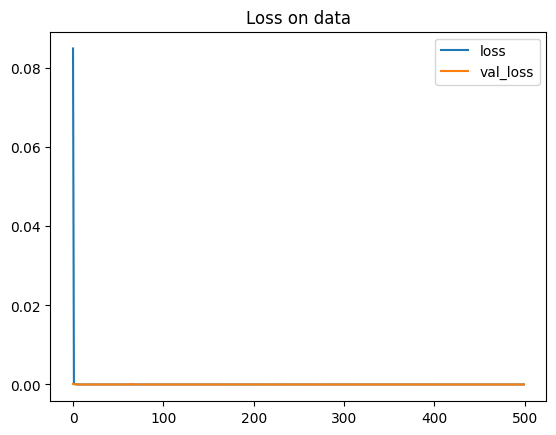

In [31]:
plt.title("Loss on data")
plt.plot(r.history['loss'], label="loss")
plt.plot(r.history['val_loss'], label="val_loss")
plt.legend()
plt.show()

In [32]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 20065 (78.38 KB)
Trainable params: 20065 (78.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
print(y_pred[-3:], "compared to ",y_test[-3:])

[[1.3468884]
 [1.3481456]
 [1.3487166]] compared to  [[1.34787]
 [1.34837]
 [1.35121]]


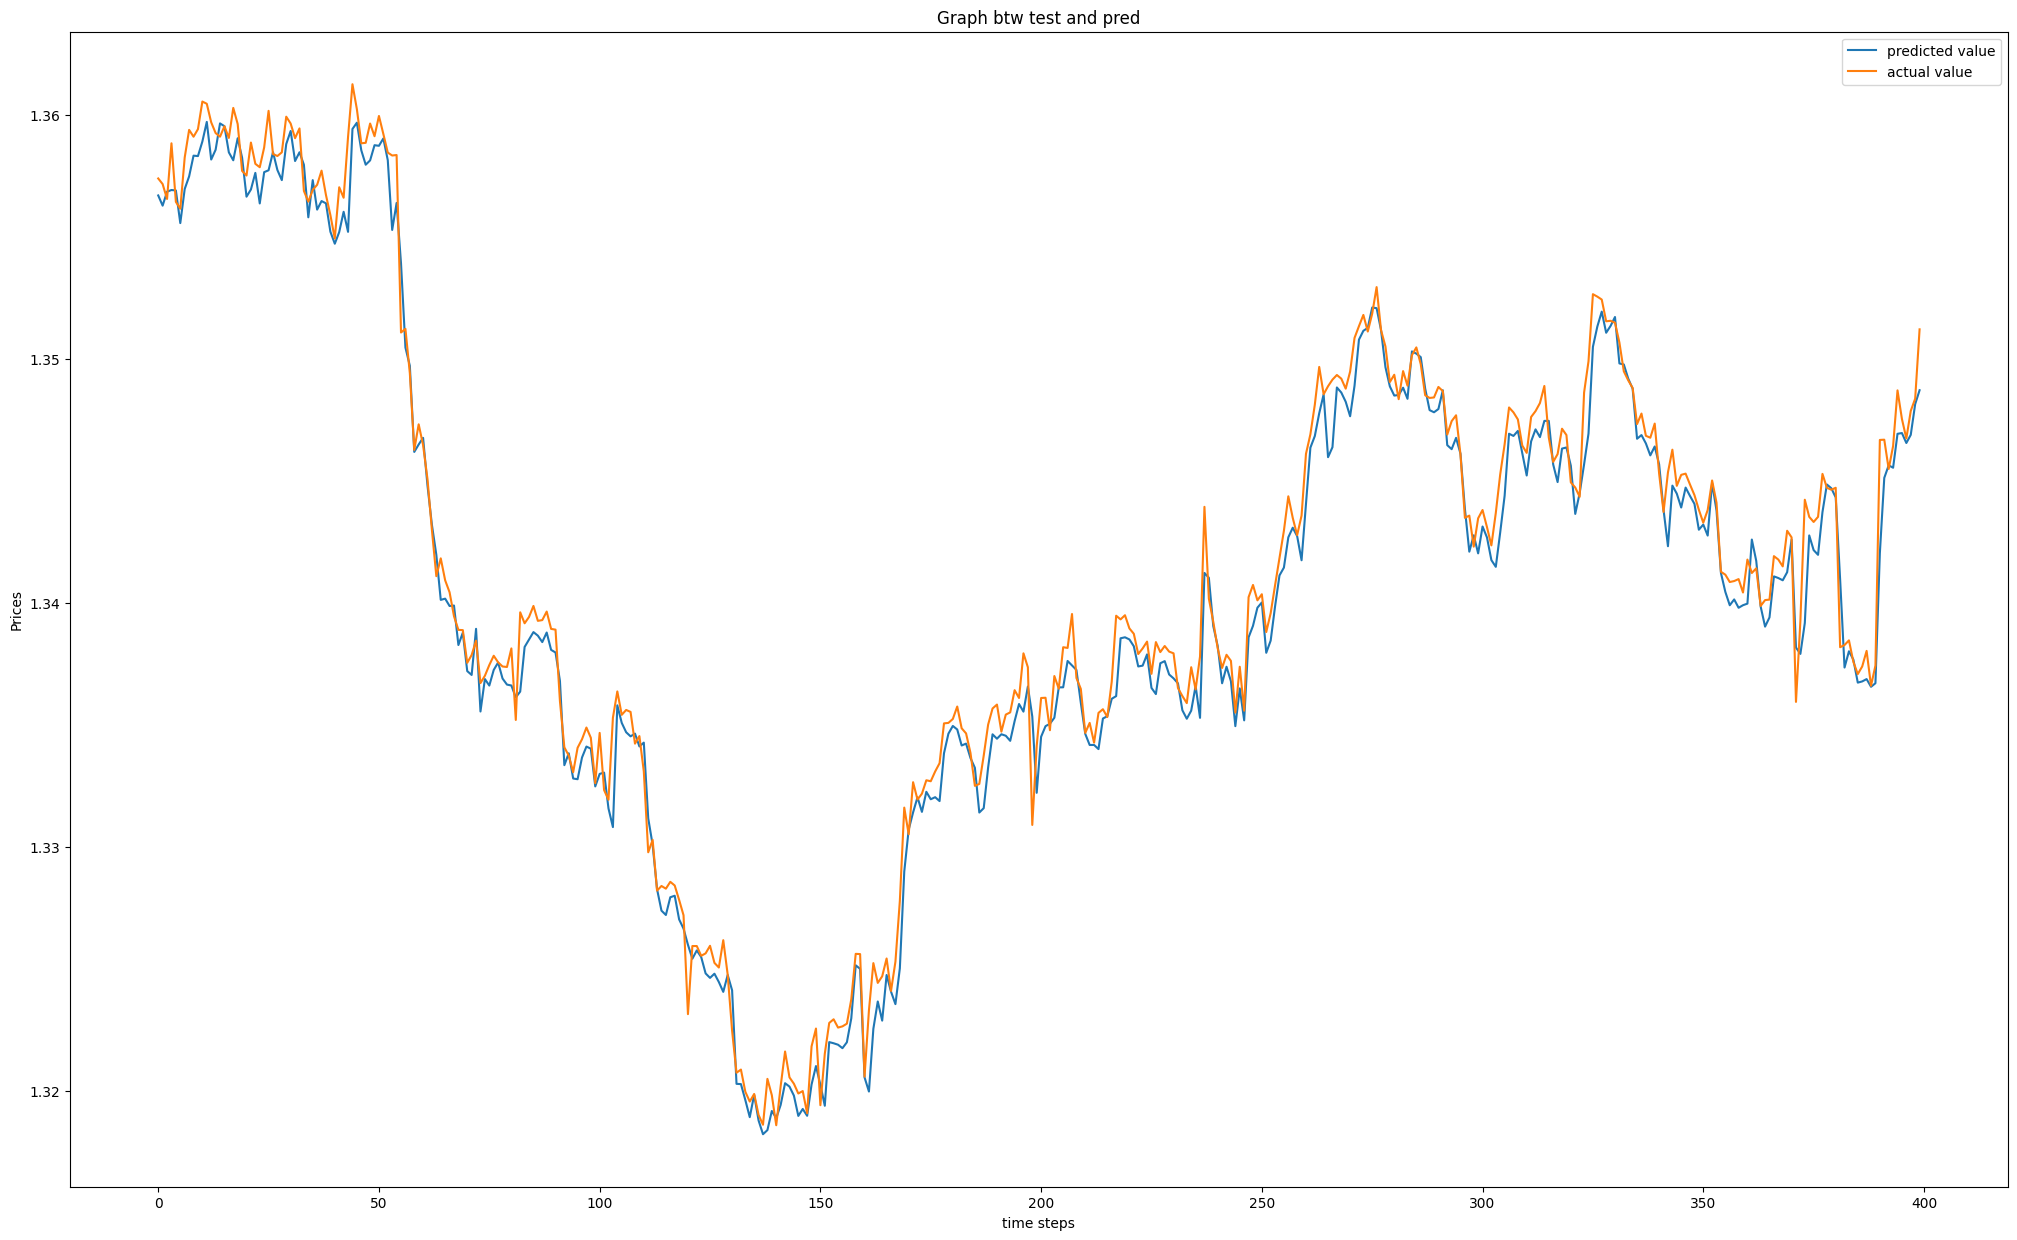

In [34]:
plt.figure(figsize=(25, 15))
plt.title("Graph btw test and pred")
plt.xlabel("time steps")
plt.ylabel("Prices")
plt.plot(y_pred[-400:], label= "predicted value")
plt.plot(y_test[-400:], label= "actual value")
plt.plot()
plt.legend()

In [37]:
print(x_test[-2:])
print(y_test[-2:])

[[[1.34787]
  [1.34846]
  [1.34866]
  [1.34913]]

 [[1.34837]
  [1.34885]
  [1.34901]
  [1.34976]]]
[[1.34837]
 [1.35121]]


In [40]:
print(series[-100:])

[[1.3441 ]
 [1.34472]
 [1.34193]
 [1.3416 ]
 [1.34134]
 [1.34051]
 [1.33819]
 [1.33711]
 [1.33817]
 [1.33823]
 [1.33768]
 [1.33828]
 [1.33855]
 [1.3389 ]
 [1.33884]
 [1.33856]
 [1.33847]
 [1.33845]
 [1.3382 ]
 [1.33843]
 [1.33844]
 [1.33759]
 [1.33774]
 [1.33746]
 [1.33742]
 [1.33757]
 [1.33709]
 [1.3375 ]
 [1.3375 ]
 [1.33758]
 [1.33752]
 [1.3374 ]
 [1.33755]
 [1.33736]
 [1.33768]
 [1.3376 ]
 [1.33804]
 [1.33788]
 [1.33801]
 [1.33706]
 [1.3369 ]
 [1.33661]
 [1.33723]
 [1.33748]
 [1.33758]
 [1.33798]
 [1.33744]
 [1.33749]
 [1.34349]
 [1.34419]
 [1.34612]
 [1.34668]
 [1.34518]
 [1.34513]
 [1.34597]
 [1.3457 ]
 [1.34669]
 [1.34649]
 [1.34675]
 [1.34632]
 [1.34612]
 [1.34549]
 [1.34576]
 [1.34578]
 [1.34653]
 [1.34587]
 [1.34643]
 [1.34685]
 [1.347  ]
 [1.34804]
 [1.34798]
 [1.34871]
 [1.34728]
 [1.34751]
 [1.3477 ]
 [1.34767]
 [1.34754]
 [1.34756]
 [1.34746]
 [1.34724]
 [1.34703]
 [1.34674]
 [1.3472 ]
 [1.34755]
 [1.34784]
 [1.34791]
 [1.34787]
 [1.34846]
 [1.34866]
 [1.34913]
 [1.34884]

In [55]:
p_series = []

t_series = [[series[-100],series[-99],series[-98],series[-97]]]
print(type(t_series))
t_s = np.array(t_series)
print(t_s)
print(t_s.shape)
y_pred = model.predict(t_s)
print(y_pred)
p_series.append(y_pred[0])
print(t_series[0][1])
for i in range(100):
    t_series[0][0] = t_series[0][1]
    t_series[0][1] = t_series[0][2]
    t_series[0][2] = t_series[0][3]
    t_series[0][3] = y_pred[0]
    t_s = np.array(t_series)
    print(t_s.shape)
    y_pred = model.predict(t_s)
    print(y_pred)
    p_series.append(y_pred[0])

p_series = np.array(p_series)
print(p_series.shape)


<class 'list'>
[[[1.3441 ]
  [1.34472]
  [1.34193]
  [1.3416 ]]]
(1, 4, 1)
1/1 [==============================] - 0s 23ms/step
[[1.3414472]]
[1.34472]
(1, 4, 1)
1/1 [==============================] - 0s 13ms/step
[[1.3410479]]
(1, 4, 1)
1/1 [==============================] - 0s 15ms/step
[[1.3404686]]
(1, 4, 1)
1/1 [==============================] - 0s 19ms/step
[[1.3399733]]
(1, 4, 1)
1/1 [==============================] - 0s 13ms/step
[[1.3395143]]
(1, 4, 1)
1/1 [==============================] - 0s 26ms/step
[[1.3390455]]
(1, 4, 1)
1/1 [==============================] - 0s 13ms/step
[[1.3385663]]
(1, 4, 1)
1/1 [==============================] - 0s 12ms/step
[[1.3380901]]
(1, 4, 1)
1/1 [==============================] - 0s 12ms/step
[[1.3376174]]
(1, 4, 1)
1/1 [==============================] - 0s 13ms/step
[[1.3371456]]
(1, 4, 1)
1/1 [==============================] - 0s 13ms/step
[[1.336674]]
(1, 4, 1)
1/1 [==============================] - 0s 15ms/step
[[1.336203]]
(1, 4, 1)
1/1 [

In [58]:
print(p_series)

[[1.3414472]
 [1.3410479]
 [1.3404686]
 [1.3399733]
 [1.3395143]
 [1.3390455]
 [1.3385663]
 [1.3380901]
 [1.3376174]
 [1.3371456]
 [1.336674 ]
 [1.336203 ]
 [1.3357333]
 [1.3352646]
 [1.3347965]
 [1.3343295]
 [1.3338634]
 [1.3333982]
 [1.332934 ]
 [1.3324705]
 [1.332008 ]
 [1.3315464]
 [1.3310858]
 [1.330626 ]
 [1.3301672]
 [1.3297093]
 [1.3292521]
 [1.328796 ]
 [1.3283409]
 [1.3278866]
 [1.3274332]
 [1.3269807]
 [1.3265291]
 [1.3260784]
 [1.3256286]
 [1.3251798]
 [1.3247318]
 [1.3242847]
 [1.3238385]
 [1.3233932]
 [1.3229488]
 [1.3225054]
 [1.3220628]
 [1.3216211]
 [1.3211805]
 [1.3207406]
 [1.3203017]
 [1.3198637]
 [1.3194267]
 [1.3189905]
 [1.3185552]
 [1.318121 ]
 [1.3176875]
 [1.3172549]
 [1.3168231]
 [1.3163925]
 [1.3159628]
 [1.3155339]
 [1.3151058]
 [1.3146787]
 [1.3142525]
 [1.3138273]
 [1.3134029]
 [1.3129793]
 [1.3125569]
 [1.3121351]
 [1.3117144]
 [1.3112944]
 [1.3108754]
 [1.3104573]
 [1.3100402]
 [1.3096238]
 [1.3092085]
 [1.3087941]
 [1.3083806]
 [1.3079679]
 [1.3075562]